I got this dataset from kaggle from the user ""Madhura Atmaram Bhagat"" and info about it :
🌾 Context
This dataset is structured to predict the most suitable crop to grow based on several agro-climatic parameters. It is typically used in precision agriculture and machine learning applications aimed at supporting farmers, agricultural advisors, and policymakers.

Features (Inputs):

N – Nitrogen content in the soil (in mg/kg)
P – Phosphorus content in the soil (in mg/kg)
K – Potassium content in the soil (in mg/kg)
temperature – Average temperature in °C
humidity – Average relative humidity in %
ph – Soil pH value
rainfall – Rainfall in mm
Label (Output):

label – The crop most suited to the given conditions (e.g., rice, maize, cotton, etc.)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


GETTING THE DATASET INTO PANDAS


In [25]:
data_frame=pd.read_csv("Crop_recommendation.csv")
print(data_frame.shape)
data_frame.sample(5)
data_frame.info()
data_frame.describe()

(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


DATA CHECKING AND HANDLING MISSING VALUES


In [26]:
print(data_frame.isnull().sum())
print("our dataset is way too clean")
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data_frame["label"]=encoder.fit_transform(data_frame["label"])
print(encoder.classes_)
data_frame["label"].value_counts()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
our dataset is way too clean
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

DATA VISULISATION


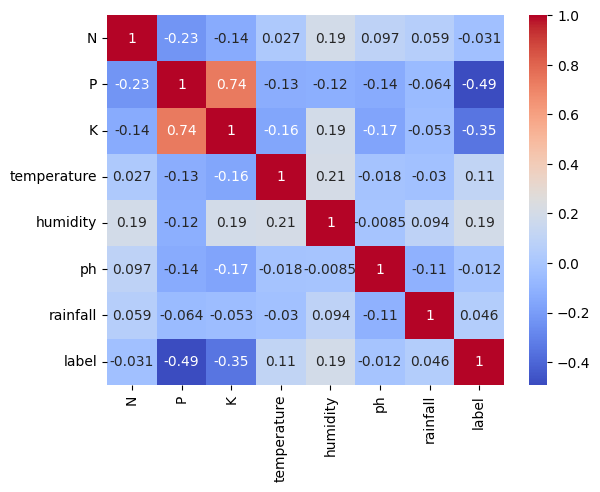

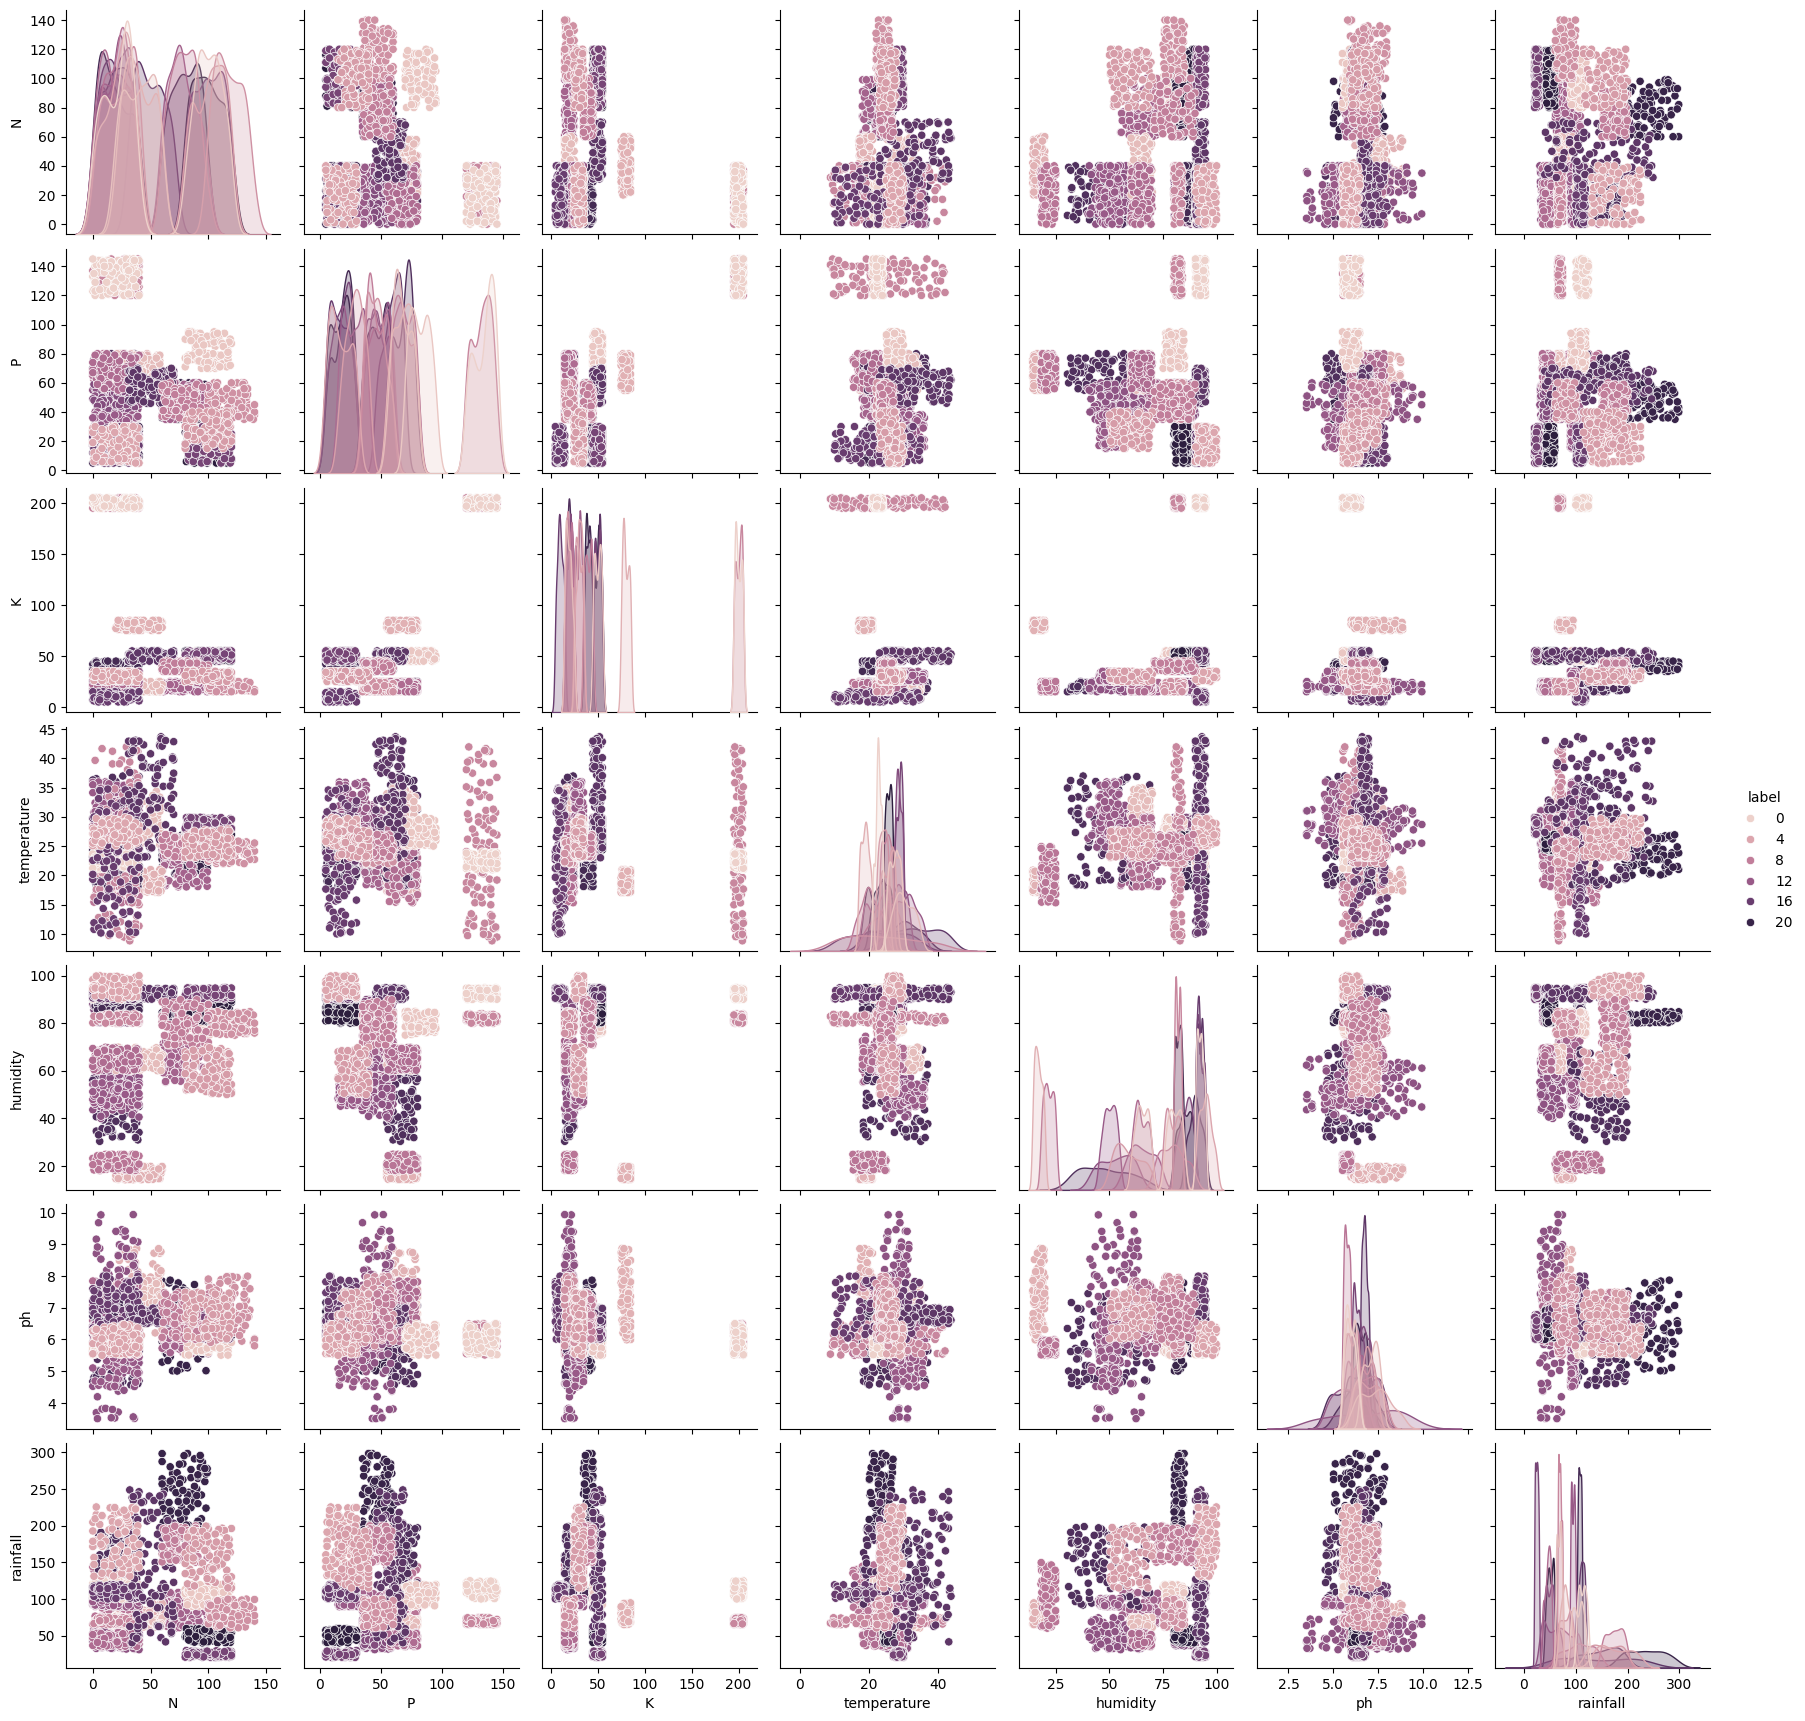

In [29]:
sns.heatmap(data_frame.corr(),annot=True,cmap="coolwarm")
sns.pairplot(data_frame,hue="label")
plt.show()

DATA PREPROCESSING


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
scaler=MinMaxScaler()
poly=PolynomialFeatures()
X=data_frame.drop(columns=["label"])
y=data_frame["label"]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=42)
print(f"{len(x_train)=} {len(x_test)=} {len(y_train)=} {len(y_test)=}")
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
print("after scaling : ")
print(x_train.shape,x_test.shape)
print(f"{len(x_train)=} {len(x_test)=} {len(y_train)=} {len(y_test)=}")
print(x_train[:1])

x_train=poly.fit_transform(x_train)
x_test=poly.transform(x_test)
print("after transformation of poly")
print(f"{len(x_train)=} {len(x_test)=} {len(y_train)=} {len(y_test)=}")
print(x_train.shape,x_test.shape)
print(x_train[:1])


len(x_train)=1650 len(x_test)=550 len(y_train)=1650 len(y_test)=550
after scaling : 
(1650, 7) (550, 7)
len(x_train)=1650 len(x_test)=550 len(y_train)=1650 len(y_test)=550
[[0.15714286 0.22142857 0.055      0.62427069 0.42584062 0.7277185
  0.15897041]]
after transformation of poly
len(x_train)=1650 len(x_test)=550 len(y_train)=1650 len(y_test)=550
(1650, 36) (550, 36)
[[1.         0.15714286 0.22142857 0.055      0.62427069 0.42584062
  0.7277185  0.15897041 0.02469388 0.03479592 0.00864286 0.09809968
  0.06691781 0.11435576 0.02498106 0.04903061 0.01217857 0.13823137
  0.09429328 0.16113767 0.03520059 0.003025   0.03433489 0.02342123
  0.04002452 0.00874337 0.38971389 0.26583981 0.45429333 0.09924057
  0.18134023 0.3098921  0.06769606 0.52957422 0.11568571 0.02527159]]


model building

In [36]:
from sklearn.svm import SVC
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
svm_model=SVC()
hgbc=HistGradientBoostingClassifier(max_iter=1000)
rfc=RandomForestClassifier(n_jobs=-1,max_depth=10)
svm_model.fit(x_train,y_train)
hgbc.fit(x_train,y_train)
rfc.fit(x_train,y_train)



RandomForestClassifier(max_depth=10, n_jobs=-1)

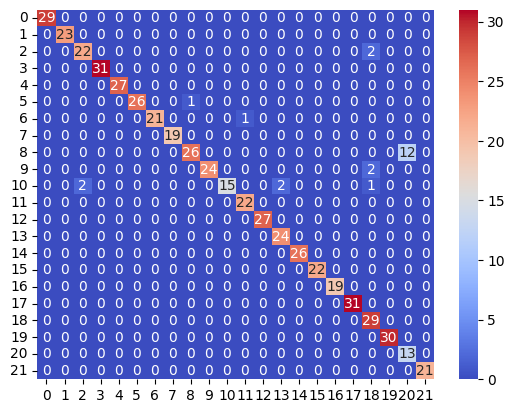

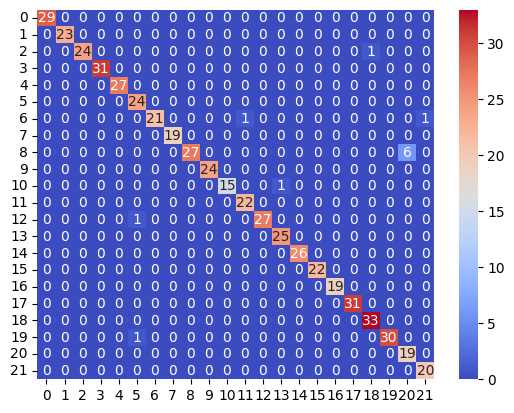

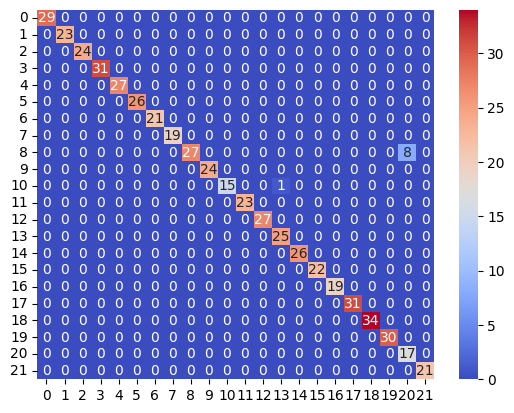

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        23
           2       0.92      0.92      0.92        24
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        27
           5       1.00      0.96      0.98        27
           6       1.00      0.95      0.98        22
           7       1.00      1.00      1.00        19
           8       0.96      0.68      0.80        38
           9       1.00      0.92      0.96        26
          10       1.00      0.75      0.86        20
          11       0.96      1.00      0.98        22
          12       1.00      1.00      1.00        27
          13       0.92      1.00      0.96        24
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        22
          16       1.00      1.00      1.00        19
          17       1.00    

In [37]:
y_preds1=svm_model.predict(x_test)
y_preds2=hgbc.predict(x_test)
y_preds3=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc1=accuracy_score(y_preds1,y_test)
acc2=accuracy_score(y_preds2,y_test)
acc3=accuracy_score(y_preds3,y_test)
matrix1=confusion_matrix(y_preds1,y_test)
matrix2=confusion_matrix(y_preds2,y_test)
matrix3=confusion_matrix(y_preds3,y_test)
report1=classification_report(y_preds1,y_test)
report2=classification_report(y_preds2,y_test)
report3=classification_report(y_preds3,y_test)


sns.heatmap(matrix1,annot=True,cmap="coolwarm")
plt.show()

sns.heatmap(matrix2,annot=True,cmap="coolwarm")
plt.show()
sns.heatmap(matrix3,annot=True,cmap="coolwarm")
plt.show()
print(report1)
print(report2)
print(report3)


In [38]:
dataframe_new=pd.DataFrame(
        [
                ["SVM",acc1*100],
                ["HistGradientBoostingClassifier",acc2*100],
                ["RandomForestClassifier",acc3*100]
        ],
        columns=["ML ALGORITHM","accuracy_score"]
)
print(dataframe_new)

                     ML ALGORITHM  accuracy_score
0                             SVM       95.818182
1  HistGradientBoostingClassifier       97.818182
2          RandomForestClassifier       98.363636
